### Storytelling Data Visualization on Exchange Rates

In this project we will work on dataset that describes Euro daily exchange rates between 1999 and 2021.

#### Introducing the Dataset

In [ ]:
import urllib.request

# GitHub raw URL for the CSV file
euro_url = 'https://raw.githubusercontent.com/Sat0ri1/MojeRep_PG/main/euro-daily-hist_1999_2022.csv'

euro_data = 'euro-daily-hist_1999_2022.csv'

# Downloading the CSV file
urllib.request.urlretrieve(euro_url, euro_data)

('euro-daily-hist_1999_2022.csv', <http.client.HTTPMessage at 0x7e5563174880>)

In [ ]:
# Importing pandas
import pandas as pd

# Reading first rows of data file
dataset = pd.read_csv('euro-daily-hist_1999_2022.csv')
dataset.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

There are 41 columns and 6455 rows in the dataset (it's newer dataset than in project)

There are null values in some columns. The biggest amount of null values is in Slovenian tolar col.

We got 3 floats and 38 objects probably being int types. For some reason only Turkish lira, Romanian leu and Iceland krona are floats.

#### Data Cleaning

Before we actually start analysis we should clean the dataset.

In [ ]:
# Changing names to more readable
dataset.rename(columns={'[US dollar ]': 'US_dollar',
                        'Period\\Unit:': 'Time'},
                        inplace=True)
# Changing Time column to a datetime type
dataset['Time'] = pd.to_datetime(dataset['Time'])

#Sorting values by Time
dataset.sort_values('Time', inplace=True)

#Resetting the index
dataset.reset_index(drop=True, inplace=True)

#Displaying
dataset.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [ ]:
#Isolating Time and Us_dollar columns to a new variable
euro_to_dollar = dataset[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

There are "-" characters we don't want, we will drop all rows containing this character

In [ ]:
# Droping rows containing -
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Converting US_dollar to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 0 to 6455
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


<ipython-input-7-47db96771a10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


#### Rolling Mean
We finished data cleaning and we can move forward to analysing the dataset. Let's generate a line plot visualizing the evolution of euro-dollar exchange rate

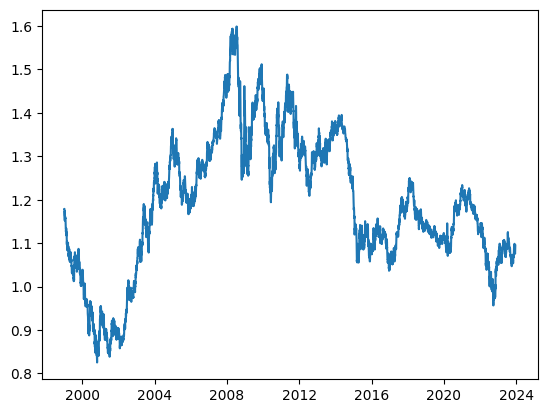

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

Differences between the daily exchange rates are strongly visible in the wiggles appearing on the plot. We don't want to analyze the daily vartiations of exchange rates now, therefore we are going to use rolling mean to create a smooth plot.

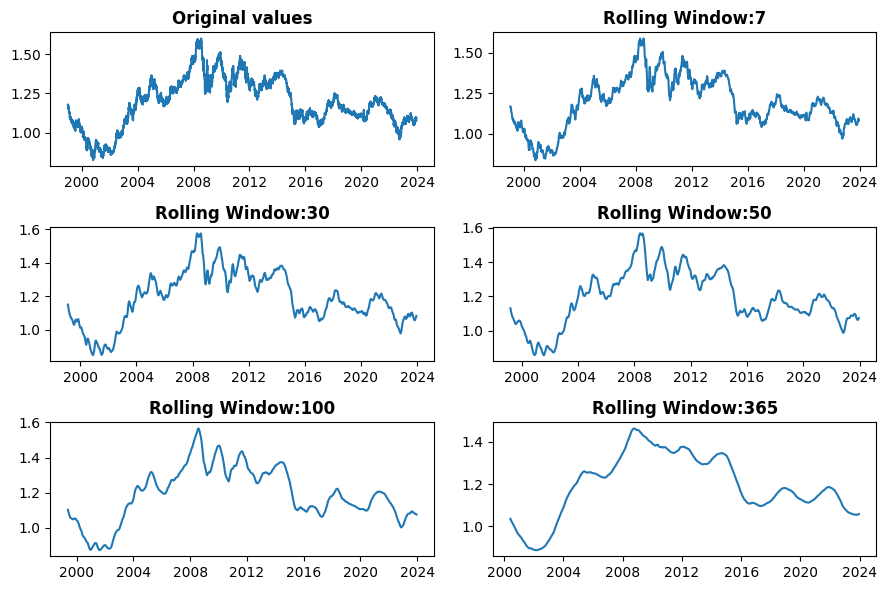

In [ ]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')

plt.tight_layout()
plt.show()

Now we can calculate the rolling means for US_dollar. For this we are going to use the rolling window of 30 days. This way we analyse how the rates changed every month

On the plots we can see the exchange rate was lowest metween 2001 and 2003 and it was in it's peak around 2008. There are a lot of ups and downs on the plots.

In [ ]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6451,2023-12-11,1.0757,1.080143
6452,2023-12-12,1.0804,1.080760
6453,2023-12-13,1.0787,1.081593
6454,2023-12-14,1.0919,1.082453


#### Coming up with an Idea

In this section we are going to come up with and idea for the graph we want to build in this analysis. We want to create a story telling data visualization for our dataset.

My idea is to focus on checking how pandemic period of coronavirus influenced the exchange rates. It is pretty fresh thing and doesn't seem so obvious, so this will be my main goal.

####  Coding the Graph

In this section I am going to build a graph for exchange rates in Coronavirus pandemic.

In [ ]:
# Selecting timeframes
euro_to_dollar_timeframe = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2016]

# Create rolling mean for the entire euro_to_dollar_timeframe
euro_to_dollar_timeframe['rolling_mean30'] = euro_to_dollar_timeframe['US_dollar'].rolling(30).mean()

# Selecting pandemics timeframe
euro_to_dollar_pandemic = euro_to_dollar.copy()[
    (euro_to_dollar['Time'].dt.year >= 2020) & (euro_to_dollar['Time'].dt.year <= 2022)
]

# Create rolling mean for the pandemics timeframe
euro_to_dollar_pandemic['rolling_mean30'] = euro_to_dollar_pandemic['US_dollar'].rolling(30).mean()

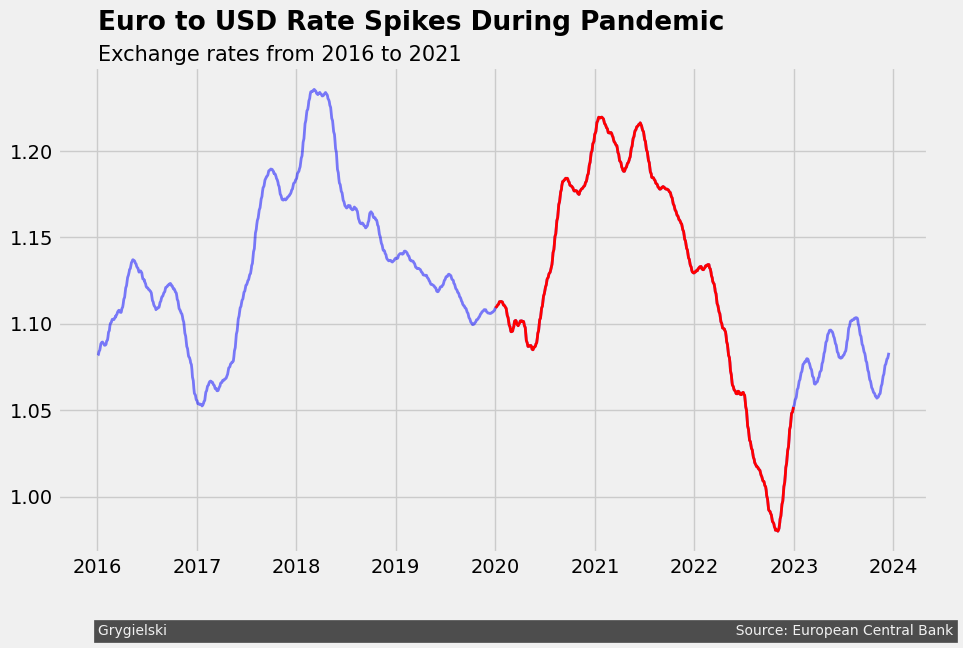

In [ ]:
# Create graph
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize to your preference

# Plotting the data
ax.plot(euro_to_dollar_timeframe['Time'], euro_to_dollar_timeframe['rolling_mean'],
        color='blue', alpha=0.5, linewidth=2)

# Darken the line segment representing the pandemic
ax.plot(euro_to_dollar_pandemic['Time'], euro_to_dollar_pandemic['rolling_mean'],
        color='red', linewidth=2)

# Add title
ax.text(euro_to_dollar_timeframe['Time'].min(), 1.27, 'Euro to USD Rate Spikes During Pandemic',
        size=19, weight='bold')
ax.text(euro_to_dollar_timeframe['Time'].min(), 1.252, 'Exchange rates from 2016 to 2021', size=15)

# Add signature
ax.text(euro_to_dollar_timeframe['Time'].min(), 0.92, 'Grygielski' + ' '*130 + 'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor='#4d4d4d', size=10)

# Show the plot
plt.show()


It seems like euro to USD rate grew a lot during covid, that means it probably cause euro to be worth more dollars than it did before covid. When pandemic started it genrally got a little bit lower(it was already decresing before) but then it started growing, it grew to above 1.20(how much dolalrs you can get for 1 euro). I made a research and it looks like here on the plot we can see the peak, rate was close to this peak untill the last months of 2021, then the rate started to decrase. It got calmer in terms of pandemic then. Due to that, we can say that pandemic probably influenced the exchange rate and made euro worth more. Now, having newer data in collab we can see that after pandemics it dropped down hard, then got back to before pandemic state.